<img src="logos/Icos_cp_Logo_RGB.svg" align="right" width="400"> <br clear="all" />


# Aided site selection based on multiple variables


For questions and feedback contact ida.storm@nateko.lu.se

To use the tool, <span style="background-color: #FFFF00">run all the Notebook cells</span> (see image below).

<img src="network_characterization/screenshots_for_into_text/how_to_run.PNG" align="left"> <br clear="all" />



### Background

ICOS currently has 13 member states and deploys almost 150 stations in the three domains atmosphere, ecosystem and ocean. 
Essential to monitor the net greenhouse gas balance of Europe and its immediate surroundings is to optimise the observation network to the evolving needs of science and policy makers. Providing the necessary information to further improve and develop models that answer the needs of these users is crucial. Extending the network to new member states and optimising the density in existing member states to fulfil these requirements can be assisted by network design tools.


For the atmosphere domain the current ICOS network consists of 38 stations that monitor CO2, CH4, CO and in increasing cases also N2O with high precision and accuracy, presenting an unprecedented dense network compared to the rest of the world. One of the main applications of the ICOS atmosphere observations is the use in regional inversion models. Inversion models, by combining observations, prior information and models, can be used to reduce the uncertainty on estimates of the net greenhouse gas fluxes at high spatial and temporal resolution and to distinguish contributions of different source and sink categories. Previous studies show that uncertainty in the atmospheric transport as well as the still existing regional gaps in the observation network are the determining factors that currently limits these inverse models. Future enhancement of methods and models and increasing high quality observations can reduce these limitations. The location for additional (ICOS-) stations needs to be carefully planned to create maximum impact on the models and enhancement of the existing network.

### Tool overview

To assist the national networks in evaluating the current and possible atmospheric network configurations, the ICOS Carbon Portal has extended its STILT footprint service with a Jupyter notebook based tools. The is the <a href="https://exploredata.icos-cp.eu/user/username/notebooks/icos_jupyter_notebooks/network_characterization.ipynb"> network characterization tool</a> which allows the user to test any potential network configuration on its capability to capture the influence of sources and sinks. The <a href="https://exploredata.icos-cp.eu/user/username/notebooks/icos_jupyter_notebooks/station_characterization.ipynb"> station characterization tool</a> offers insight to the characteristics of any hypothetical station.  This notebook is intended to be used as a complement to these tools. It allows the user to explore the relationship between selected sites – potential and/or existing – in terms of selected variables.  What makes for a good site, and hence what variables are interesting to compare is up to the user to define.

#### Settings

A "settings file" (settings.json) which specifies all the settings used to produce the result can be downloaded. It will end up in a folder called “output” in the home directory. In the output folder there will be a subfolder called “optimize network”. It can in turn be uploaded to replicate the run in the future by uploading it to the optional "Load settings 


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append('./optimize_network')
sys.path.append('./station_characterization')
import gui_optimize_network

Loading BokehJS ...

Output()

In [3]:
test = gui_optimize_network.df_saved_for_normalized

In [4]:
test

,Station,Broad leaf forest,Coniferous forest,Mixed forest,Grass/shrubland,Cropland,Pasture,Urban,Ocean,Other,Unknown,Sensitivity,Population,Point source contribution,Anthropogenic contribution
0,KRE250,4.863131,16.154811,38.169839,4.912721,82.794225,25.666497,33.027427,0.732241,3.011805,9.491941,21.437149,24.464580,29.652624,37.562946
1,PAL,1.177282,100.000000,26.173413,100.000000,0.000000,0.000000,0.000000,0.739539,41.710651,73.463012,99.520489,0.000000,0.000000,0.000000
2,PUI,1.956597,39.782879,61.412633,7.007627,8.970318,1.172016,3.605278,0.000000,45.268998,51.647315,27.132508,2.627394,4.298778,10.145374
3,SMR125,2.069373,45.867449,48.527431,6.269793,18.930073,3.145172,6.197270,2.273763,32.629765,45.479395,32.007943,4.405492,6.929531,13.308812
4,UTO,2.166210,23.917148,30.840058,6.331187,24.177682,6.240287,7.743516,17.538700,15.461328,45.497182,42.258714,5.660127,8.193130,15.884265
5,OPE120,10.528697,6.552378,44.332583,1.313925,86.386270,31.571496,36.311814,3.053349,1.948608,8.583172,25.445559,28.409215,32.042983,42.290241
6,PUY,4.977680,3.993559,40.068084,0.705447,34.795999,36.812136,16.612915,4.210327,0.112848,10.187981,8.706439,14.706049,8.987072,15.101150
7,SAC100,7.017852,3.588737,25.494710,0.000000,100.000000,22.486292,55.726291,6.473137,0.108218,3.521243,27.729863,95.466107,30.539404,100.000000
8,TRN180,6.394735,3.980918,30.968348,0.477555,85.919942,24.023250,33.434141,5.563330,0.000000,4.584761,21.474735,29.925971,17.924655,33.469288
9,GAT344,2.667265,13.185638,23.863251,2.327960,60.063434,20.630937,27.574884,4.598516,3.126916,10.791475,19.524739,22.037893,34.674966,37.642040


In [12]:
#data = test.iloc[:, -2:].values
data = test.iloc[:, [-3, -1]].values
#new = test[['Population', 'Anthropogenic contribution']].copy()
print(data)

[[ 24.46457989  37.56294562]
 [  0.           0.        ]
 [  2.627394    10.14537398]
 [  4.40549195  13.30881229]
 [  5.66012666  15.88426477]
 [ 28.40921507  42.29024141]
 [ 14.70604853  15.10115   ]
 [ 95.46610698 100.        ]
 [ 29.92597124  33.46928825]
 [ 22.03789326  37.64204023]
 [ 26.28047225  50.36103174]
 [ 44.42355686  44.33961948]
 [ 64.74113394  92.87036668]
 [ 31.5236236   64.40157054]
 [ 30.05541649  45.22180161]
 [ 28.79703498  51.34794724]
 [ 31.33541904  55.5952156 ]
 [ 28.42375784  49.75689844]
 [  2.9666444    2.55507432]
 [100.          98.98965533]
 [  8.88724182   8.48804812]
 [ 35.9929523   30.92755657]
 [ 13.79255011  10.89764103]
 [ 47.65497381  82.2929228 ]
 [ 33.46848509  58.85953857]
 [  8.40280545  21.12592596]
 [ 14.75674783  24.4083441 ]
 [  8.50747644  17.23233969]
 [  1.69247834   3.4439148 ]
 [ 15.51180505  12.67524149]]


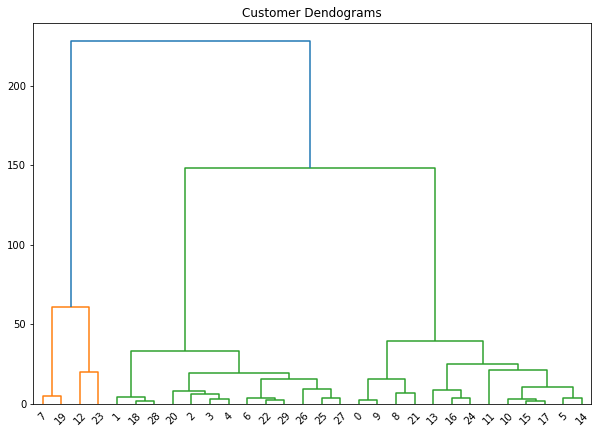

In [13]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)



array([0, 2, 2, 2, 2, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 2, 0,
       2, 1, 0, 2, 2, 2, 2, 2])

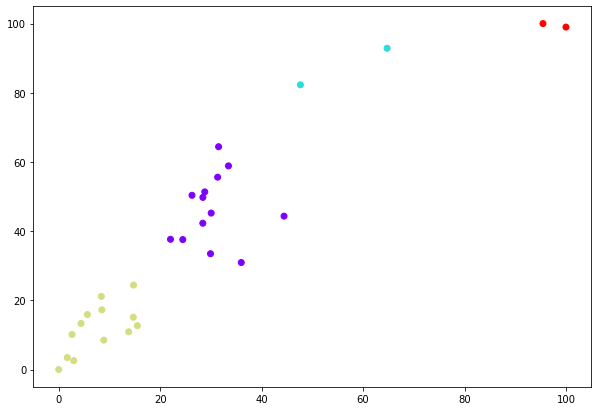

In [15]:
plt.figure(figsize=(10, 7))

plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')